In [1]:
import pandas as pd
import cv2 as cv
import sys 

import sklearn
import numpy as np 
import os
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.utils import io

In [2]:
sync = pd.read_csv('data/hands/Training/Evyatar Cohen/Evyatar636771053639929594Sync.csv')
spot = pd.read_csv('data/hands/Training/Evyatar Cohen/Evyatar636771052727603804Spontan.csv')
alone = pd.read_csv('data/hands/Training/Evyatar Cohen/Evyatar636771054555711409Alone.csv')
alone_cmp = pd.read_csv('data/hands/HandRight.csv')


In [3]:
alone_cmp.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.67167,226.2064,20.26470,34.26665,-195.214700,-35.043020,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.24119,222.9389,20.11781,36.16443,-180.093900,-4.052799,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.72461,220.9709,19.94972,26.35298,-95.088190,-11.157620,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.09016,219.7124,19.67679,19.46804,-61.755180,-21.303780,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.46017,219.3652,19.13128,21.94964,-8.355943,-35.081790,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0


In [4]:
alone.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,518.8087,149620,left,1,-97.60160,164.1213,42.81255,104.2589,-491.6730,-55.42755,...,1.661706,-166.7207,164.8320,27.58547,-378.1662,65.89330,-69.90282,0.0,0.741855,0.0
1,518.8252,149622,left,1,-95.78062,157.6353,42.18084,148.9683,-351.7386,-36.32422,...,1.623222,-165.4907,155.6419,29.71037,-380.3233,52.92441,-55.71872,0.0,0.827916,0.0
2,518.8418,149623,left,1,-94.39360,154.6338,41.93171,161.6958,-349.9117,-29.04277,...,1.602898,-164.3658,151.5701,31.05059,-381.7444,48.55032,-47.27909,0.0,0.920401,0.0
3,518.8587,149625,left,1,-92.02553,150.6723,42.10119,117.3475,-187.1781,24.42598,...,1.567605,-162.2663,144.6214,33.94577,-383.4688,40.27151,-30.72728,0.0,1.034603,0.0
4,518.8749,149627,left,1,-89.31953,148.1826,42.67065,155.3344,-135.6337,35.87055,...,1.535920,-159.4586,138.6087,36.68195,-381.0906,29.07133,-17.01065,0.0,1.166705,0.0


In [5]:
alone_cmp['Time'] = alone_cmp['Time'] + (518-128)
alone_cmp.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,518.2883,15478,right,1,15.67167,226.2064,20.26470,34.26665,-195.214700,-35.043020,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,518.3048,15480,right,1,16.24119,222.9389,20.11781,36.16443,-180.093900,-4.052799,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,518.3218,15482,right,1,16.72461,220.9709,19.94972,26.35298,-95.088190,-11.157620,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,518.3384,15484,right,1,17.09016,219.7124,19.67679,19.46804,-61.755180,-21.303780,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,518.3551,15486,right,1,17.46017,219.3652,19.13128,21.94964,-8.355943,-35.081790,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0


In [6]:
sync = sync.set_index('Time')
spot = spot.set_index('Time')
alone = alone.set_index('Time')
alone_cmp = alone_cmp.set_index('Time')

In [7]:
sync.describe()

,Frame ID,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
count,9052.000000,9052.0,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000,9052.000000
mean,143388.346001,2.0,5.647288,209.278261,55.868071,0.238445,0.225475,0.850930,1.315396,-0.057251,0.157984,4.575115,158.159692,61.188082,6.380085,-2.176946,79.079078,0.052222,0.293589,0.064351
std,2493.597086,0.0,118.718007,44.192337,32.296797,147.980059,196.773633,111.647476,0.434744,1.197520,1.350056,156.895177,39.492472,26.155052,329.424209,42.327201,63.235012,0.191316,0.522550,0.236759
min,139071.000000,2.0,-217.942500,107.100600,-44.676160,-475.380300,-810.745400,-387.027100,-2.954897,-2.276062,-3.058041,-277.345600,49.805000,-43.684530,-433.874200,-144.463200,-96.707020,0.000000,0.000000,0.000000
25%,141228.000000,2.0,-99.393338,177.407525,38.374075,-82.376210,-126.592050,-55.624203,1.096332,-1.214812,-1.101186,-135.595850,130.413600,45.554032,-316.095350,-28.795952,34.326723,0.000000,0.000000,0.000000
50%,143389.000000,2.0,-16.569580,207.774150,55.832915,-0.899348,-2.432009,-3.558813,1.358155,-0.007940,-0.034884,-38.189295,156.071100,59.781100,-14.472200,-2.831220,73.425980,0.000000,0.051252,0.000000
75%,145548.000000,2.0,121.718500,236.004675,73.559757,75.536423,133.897675,51.801118,1.567713,1.091603,1.401628,155.388375,181.779450,76.571147,340.237350,26.344212,117.494100,0.000000,0.259256,0.000000
max,147706.000000,2.0,231.950400,364.360600,161.744600,722.144500,651.744600,446.845000,3.054946,2.343883,3.112755,291.070900,297.084100,155.547500,503.926100,152.365300,281.935700,1.000000,2.958842,1.000000


In [8]:
sync.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9052 entries, 427.231 to 502.1996
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0    Frame ID        9052 non-null   int64  
 1    Hand Type       9052 non-null   object 
 2    # hands         9052 non-null   int64  
 3    Position X      9052 non-null   float64
 4    Position Y      9052 non-null   float64
 5    Position Z      9052 non-null   float64
 6    Velocity X      9052 non-null   float64
 7    Velocity Y      9052 non-null   float64
 8    Velocity Z      9052 non-null   float64
 9    Pitch           9052 non-null   float64
 10   Roll            9052 non-null   float64
 11   Yaw             9052 non-null   float64
 12   Wrist Pos X     9052 non-null   float64
 13   Wrist Pos Y     9052 non-null   float64
 14   Wrist Pos Z     9052 non-null   float64
 15   Elbow pos X     9052 non-null   float64
 16   Elbow Pos Y     9052 non-null   float64
 17   E

In [9]:
sync.head()

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Time,,,,,,,,,,,,,,,,,,,,,
427.2310,139071,right,2,69.65445,209.9525,-18.54797,-65.04708,338.2631,-102.57630,0.865190,...,-0.763543,112.1363,162.7645,10.928120,275.1779,-7.356547,87.30630,0.0,0.059833,0.0
427.2310,139071,left,2,-87.18215,204.5752,-40.50642,171.17460,247.9453,-96.48488,1.239694,...,1.220096,-137.3886,158.1433,-27.829490,-261.8767,-47.873840,30.62584,0.0,0.000000,0.0
427.2483,139073,right,2,68.97833,215.1191,-20.12599,-44.44045,302.9170,-83.93305,0.863391,...,-0.766907,111.5590,167.9522,9.239409,272.0606,-5.603438,83.23297,0.0,0.090605,0.0
427.2483,139073,left,2,-85.20093,209.7387,-41.18375,70.93041,344.8777,-46.40427,1.294470,...,1.276068,-135.5462,162.8801,-30.982930,-259.9806,-43.469070,26.40578,0.0,0.000000,0.0
427.2641,139075,right,2,68.11068,220.9579,-21.77186,-22.08052,307.0574,-67.08289,0.875840,...,-0.767062,110.1764,173.1205,7.244619,267.7276,-2.693964,82.23973,0.0,0.069295,0.0


In [10]:
left_s = sync[sync[' Hand Type'] == 'left']
right_s = sync[sync[' Hand Type'] == 'right']

left_sp = spot[spot[' Hand Type'] == 'left']
right_sp = spot[spot[' Hand Type'] == 'right']

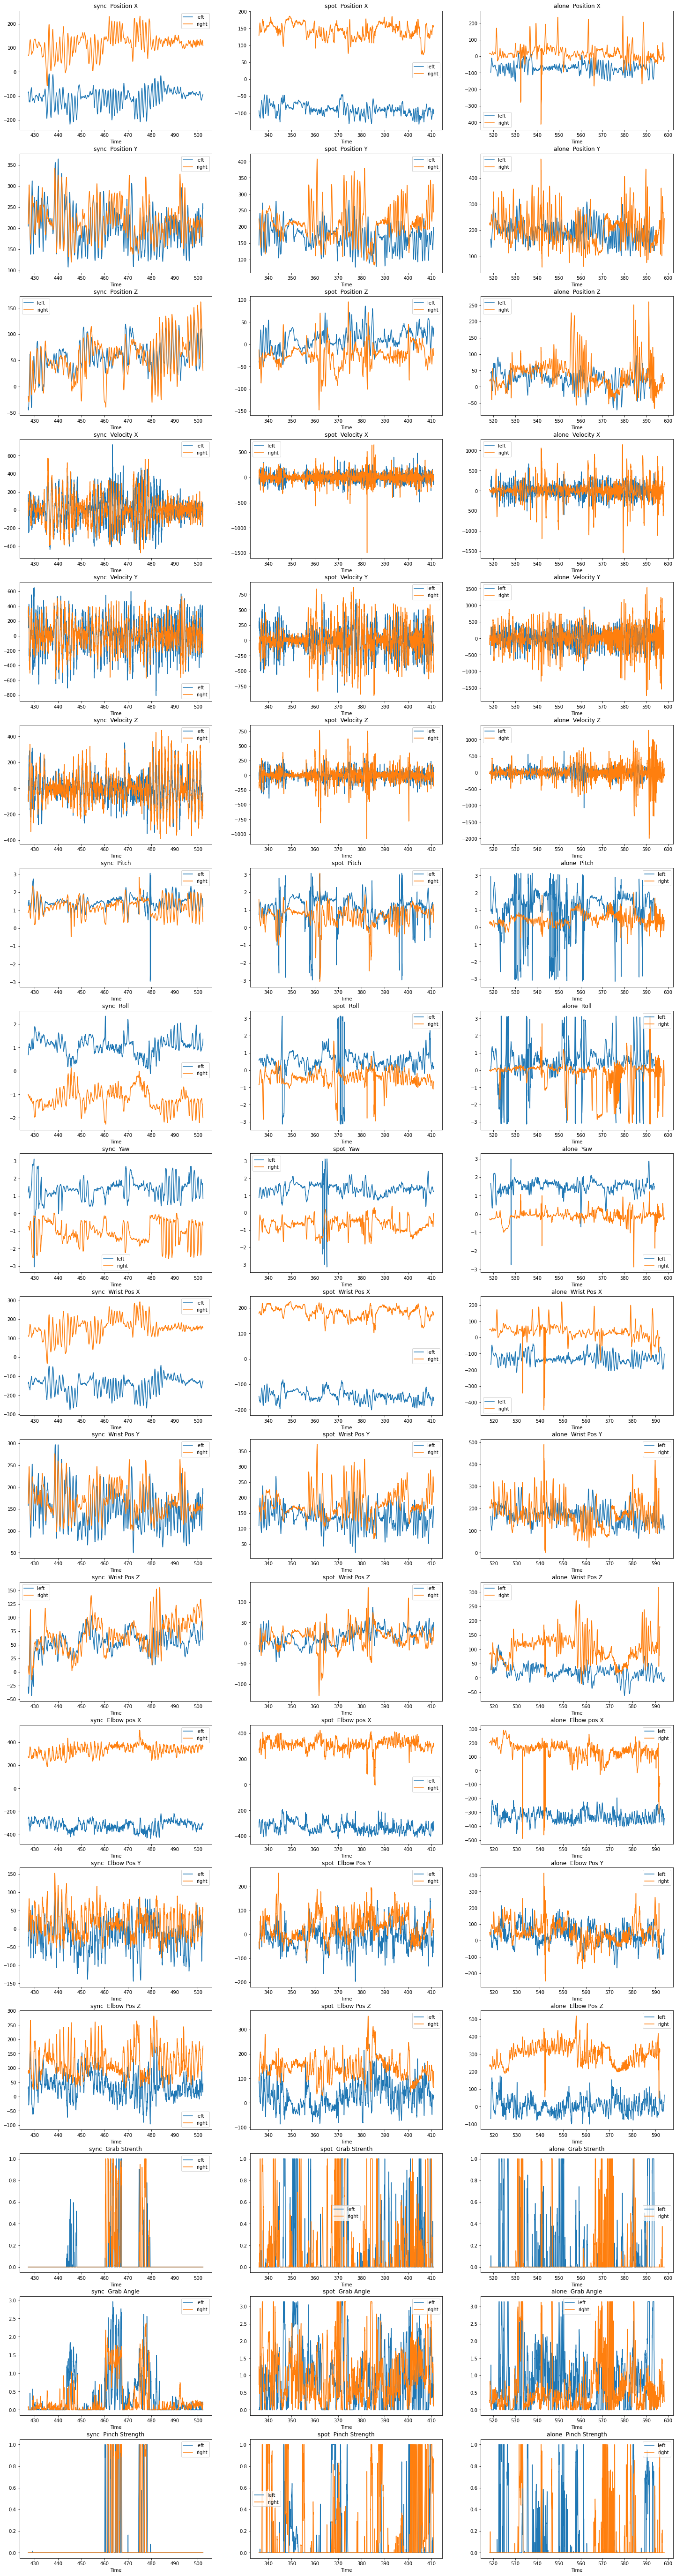

In [20]:
plt.figure()
i = 1
for x in range(1,54 ,3):
    plt.subplot(18,3,x)
    left_s.iloc[:,i+2].plot(figsize=(25,100),label='left')
    right_s.iloc[:,i+2].plot(figsize=(25,100),label='right')
    plt.title("sync {}".format(left_s.columns[i+2]))
    plt.legend()

    plt.subplot(18,3,x + 1)
    left_sp.iloc[:,i+2].plot(figsize=(25,100),label='left')
    right_sp.iloc[:,i+2].plot(figsize=(25,100),label='right')
    plt.title("spot {}".format(left_s.columns[i+2]))
    plt.legend()
    
    plt.subplot(18,3,x + 2)
    alone.iloc[:,i+2].plot(figsize=(25,100),label='left')
    alone_cmp.iloc[:,i+2].plot(figsize=(25,100),label='right')
    plt.title("alone {}".format(left_s.columns[i+2]))
    plt.legend()

    i = i + 1
plt.show()



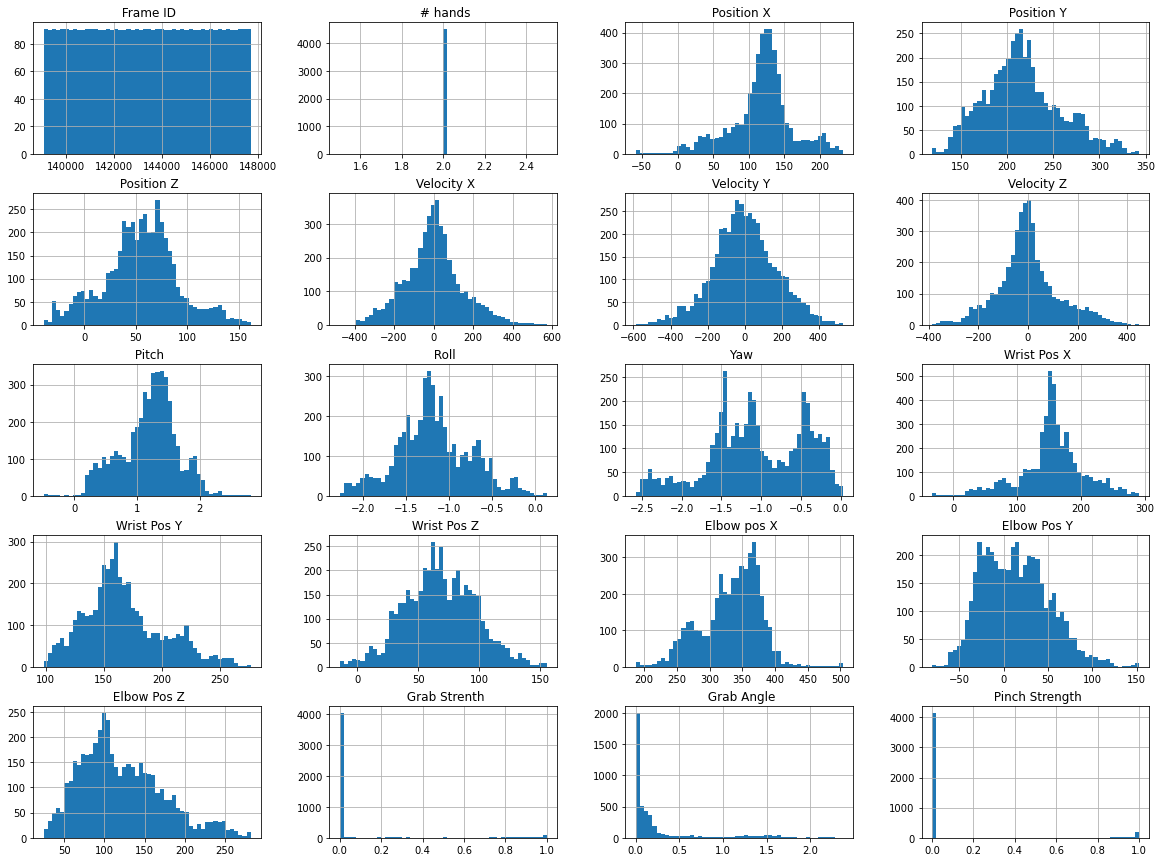

In [12]:
right_s.hist(bins=50,figsize=(20,15))
plt.show()

In [13]:
left_sp.head()

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Time,,,,,,,,,,,,,,,,,,,,,
335.9984,128556,left,2,-93.24845,143.9423,-37.81597,-109.09820,240.3898,-67.629590,0.721306,...,0.873458,-147.0455,109.9380,-5.326688,-329.8577,-34.41571,93.88171,0.0,0.014736,0.0
336.0150,128558,left,2,-94.86554,148.5542,-39.00158,-80.99012,278.6022,-66.793560,0.751707,...,0.879703,-148.2022,113.0909,-7.375025,-326.9279,-39.97873,85.98000,0.0,0.000000,0.0
336.0315,128560,left,2,-95.16259,152.5339,-39.94570,-11.37293,232.8031,-53.320790,0.783206,...,0.895820,-148.3343,115.9295,-9.437292,-322.0559,-44.42383,81.02193,0.0,0.000000,0.0
336.0481,128562,left,2,-95.37997,156.0973,-40.18840,-3.05615,203.8121,19.494730,0.822692,...,0.918827,-148.3562,118.3093,-10.919770,-314.2976,-49.04110,81.41824,0.0,0.000000,0.0
336.0651,128564,left,2,-97.10074,161.7751,-40.36338,-98.92747,316.6452,-7.328697,0.878569,...,0.946004,-149.2292,121.7602,-12.780660,-299.9106,-56.55378,85.03669,0.0,0.000000,0.0


In [21]:
pitch_cmp = pd.DataFrame()

In [15]:
pitch_cmp['alone'] = left_s['Pinch Strength'] - right_s['Pinch Strength']

<AxesSubplot:xlabel='y', ylabel='x'>

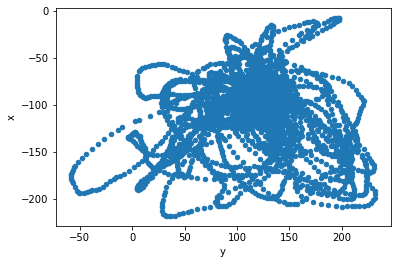

In [16]:
l_cmp.plot(kind='scatter',x='y',y='x')